**NOTE**: Please make a personal copy of this notebook by selecting 'File' > 'Save a copy in Drive' in the menu bars above.


Overview
=====================

While programming offers a powerful way to automate repetitive processes, it's only applicable if we are able to precisely specify and program the behavior we want. Machine learning offers us a way to avoid this need for exact specification by only requiring us to specify a goal, and then having an algorithm learn a way to achieve that goal.

The machine learning workflow typically consists of the following steps

1. Acquire and process data for the problem of interest
2. Choose a model
3. Define an objective
4. Train the model on the training data
5. Evaluate the trained model on the test data

We will walk through these steps in a simple but realistic setting.

# Setup


This lab is a Colab notebook, an interactive Python environment.
A notebook consists of multiple text blocks (like this one) and code blocks.
You can write code blocks, and then execute the code by highlighting the block then pressing control+enter. Try this with the following cell.


In [ ]:
%matplotlib inline


This lab relies on a number of standard scientific computing Python packages. The most important of these is NumPy (Numerical Python, commonly imported as `np`), which is a Python package for numerical computing. We'll briefly cover common numpy functions and syntax; you can find a more in-depth guide [here](https://numpy.org/doc/stable/user/quickstart.html) and you can always consult the documentation or Google if you're confused about a function.

The core object of numpy is the `array`, which is similar an ordinary Python list. Numpy arrays are frequently multi-dimensional (like a list of lists), and we call each dimension an axis.

You can create numpy arrays through a variety of ways:

In [ ]:
import numpy as np

# call np.array on a valid Python list
array = np.array([[1, 2, 3], [4, 5, 6]])
print("Array 1:\n", array)

# initialize an array of all zeroes or ones
array = np.zeros((3, 4)) # where (3,4) is the shape of the array
print("Array 2:\n", array)

array = np.ones((3, 4, 5)) # where (3, 4, 5) is the shape of the array
print("Array 3:\n", array)

# initialize an array from a particular distribution
array = np.random.normal(loc=0.0, scale=1.0, size=(3,4))  # uses a normal distribution with a mean at 0 and standard deviation of 1.0
print(array)
#print("\nMean of array:", array_normal.mean())
#print("\nStandard deviation of array:", array_normal.std())
#print("\nMean of array along axis-0 (columns):", array_normal.mean(axis=0))


Array 1:
 [[1 2 3]
 [4 5 6]]
Array 2:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Array 3:
 [[[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]]
[[-0.16236085 -1.00356291  1.31738934 -1.29906909]
 [-2.58923265  1.88304312  0.62635984 -1.20313065]
 [-0.0580021   0.89435567  0.64325152  1.30081053]]


Unlike Python lists, numpy arrays must
* have the same number of elements along each dimension (e.g. `[[1], [2,3]]` would not be a valid numpy array).
* have all elements be of the same type

We can check the type and shape (dimensions) of an array using built-in numpy attributes of arrays.

In [ ]:
array = np.array([[[1], [2]], [[3], [4]], [[5], [6]]])
print("Data type:", array.dtype)
print("# dimensions:", array.ndim)
print("Shape/size of array:", array.shape)
print("# elements:", array.size)
print(array)

Data type: int64
# dimensions: 3
Shape/size of array: (3, 2, 1)
# elements: 6
[[[1]
  [2]]

 [[3]
  [4]]

 [[5]
  [6]]]


We can access specific elements of an array using braces (like Python lists) and colons (slices).

In [ ]:
array = np.arange(24).reshape(4, 6)

print("Array:\n", array)
print("Element 1, 2: ", array[1, 2]) # access one element

print("Column 2:", array[:, 1]) # access a column, using slice notation (:)
print("Row 1:", array[0]) # access a row

print("2nd-4th row, 1st-3rd col:\n", array[1:3, 0:2]) # partial rows and cols

# accessing elements using an array
print("Selecting one element from each row of array using indices in ind:")
inds = np.array([0, 2, 0, 1])
print(array[np.arange(4), inds])  # Prints "[ 0  8  12 19]"
print("-----")

Array:
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
Element 1, 2:  8
Column 2: [ 1  7 13 19]
Row 1: [0 1 2 3 4 5]
2nd-4th row, 1st-3rd col:
 [[ 6  7]
 [12 13]]
Selecting one element from each row of array using indices in ind:
[ 0  8 12 19]
-----


Numpy arrays contain many useful functions as built-in methods for arrays. For example, one of the most useful is `array.sum()`. Other useful methods include `min(), max(), argmin(), argmax(), mean(), std()`. All of these methods take in an `axis` argument that specifies the dimension along which to perform the operation.

In [ ]:
# mathematical methods
x = np.array([[1,2],[3,4]])
print("x: \n", x)
print("-----")
print("Compute sum of all elements in x: ", np.sum(x))  # Compute sum of all elements; prints "10"
print("-----")
print("Compute sum of each column in x:", np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print("-----")
print("Compute sum of each row in x: ", np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"
print("-----")

x: 
 [[1 2]
 [3 4]]
-----
Compute sum of all elements in x:  10
-----
Compute sum of each column in x: [4 6]
-----
Compute sum of each row in x:  [3 7]
-----


We can transform arrays using Python built-in math operators, as well as more complex math operators in numpy, such as `np.power(), np.exp(), np.sqrt(), np.cos()`, etc.

In [ ]:
# mathematical transformations
array = np.arange(9).reshape((3,3))
print("Array 1:\n", array)

print(array + 3) # add a constant to every value, broadcasting
array[0] *= 2 # add a constant to only one row
print(array)
print(np.power(array, 2)) # square every element

Array 1:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[0 2 4]
 [3 4 5]
 [6 7 8]]
[[ 0  4 16]
 [ 9 16 25]
 [36 49 64]]


We can also transform the dimensions and shape of arrays.

In [ ]:
# reshaping
array = np.arange(9)
print("Array 0:\n", array)
print("Array 0 shape:", array.shape)
array = array.reshape(3, 3)
print("Array 0:\n", array)
print("Array 0 shape:", array.shape)
print()

array1 = np.arange(9).reshape((3,3))
array2 = np.arange(9, 18).reshape((3, 3))
print("Array 1:\n", array1)
print("Array 2:\n", array2)
stack_h = np.hstack((array1, array2))
stack_v = np.vstack((array1, array2))
print("Horizontally stacked array 1 and array 2:\n", stack_h)
print("Vertically stacked array 1 and array 2:\n", stack_v)


Array 0:
 [0 1 2 3 4 5 6 7 8]
Array 0 shape: (9,)
Array 0:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
Array 0 shape: (3, 3)

Array 1:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
Array 2:
 [[ 9 10 11]
 [12 13 14]
 [15 16 17]]
Horizontally stacked array 1 and array 2:
 [[ 0  1  2  9 10 11]
 [ 3  4  5 12 13 14]
 [ 6  7  8 15 16 17]]
Vertically stacked array 1 and array 2:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]]


We can do all the standard matrix operations using these numpy arrays. Here we show addition, transposing a matrix, matrix multiplication, and matrix inversion.

In [ ]:
A = np.random.randint(10, size=(3, 4))
B = np.random.randint(10, size=(3, 4))
print("Matrix A:\n", A)
print("\nMatrix B:\n", B)
print("\nA+B:\n", A+B)
print("\nTranspose B:\n", B.transpose())
print("\nShape of transpose(B):", B.transpose().shape)
print("\nMatrix multiplication of A and transpose(B):\n", np.matmul(A,B.transpose()))

C = np.matmul(A,B.transpose())
print("\n Invert AB:", np.linalg.inv(C))

Matrix A:
 [[2 9 8 5]
 [2 0 5 3]
 [9 2 3 8]]

Matrix B:
 [[4 3 4 0]
 [4 6 2 9]
 [2 1 2 9]]

A+B:
 [[ 6 12 12  5]
 [ 6  6  7 12]
 [11  3  5 17]]

Transpose B:
 [[4 4 2]
 [3 6 1]
 [4 2 2]
 [0 9 9]]

Shape of transpose(B): (4, 3)

Matrix multiplication of A and transpose(B):
 [[ 67 123  74]
 [ 28  45  41]
 [ 54 126  98]]

 Invert AB: [[ 0.02185603  0.07892454 -0.04952298]
 [ 0.01532235 -0.07429893  0.01951431]
 [-0.03174328  0.05203816  0.01240243]]


**(exercises)** 


1. Write a function that converts an array of Celsius temperatures into an array of Farenheit temperatures (according to the formula $C = (F - 32) / 1.8$.

2. Write a function that sets the first row of a matrix to zero.

3. Create a 5x5 array of the numbers from 1-25, and then append a row of zeroes to the end.

4. Compute the product of $A$ and $B$, where $A$ is a 2x2 matrix of the first four even numbers squared and $B$ is a 2x2 matrix of the first four odd numbers squared.

5. Write a function that divides each column of a matrix by its standard deviation.



In [ ]:
# Task 1
arr1=np.arange(20, 30).reshape(2,5)
def convert(C):
  F=C*1.8+32
  print(F)
print(arr1)
convert(arr1)
print("---------------------")

# Task 2 (uses the arr1 from Task 1)
arr1[0]*=0
print(arr1)
print("---------------------")

# Task 3
array = np.arange(1, 26).reshape(5,5)
zeroes = np.zeros((1,5))
temp=np.vstack((array,zeroes)).astype(int) # For some reasons, vstack changes data type into float64, so I converted it into int64 for better look :)
print(temp)
print(type(temp[2,0]))
print("---------------------")

# Task 4
A=np.array([[0, 4], [16, 36]])
B=np.array([[1, 9], [25, 49]])
print(np.matmul(A,B))
print("---------------------")

# Task 5
def divide(arr):
  lst = list()
  for i in range(np.shape(arr)[1]):
    lst.append(np.std(arr[:,i]))
  return np.true_divide(arr,lst)
divide(temp) # checking the function performance on the "temp" array initiated before

[[20 21 22 23 24]
 [25 26 27 28 29]]
[[68.  69.8 71.6 73.4 75.2]
 [77.  78.8 80.6 82.4 84.2]]
---------------------
[[ 0  0  0  0  0]
 [25 26 27 28 29]]
---------------------
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [ 0  0  0  0  0]]
<class 'numpy.int64'>
---------------------
[[ 100  196]
 [ 916 1908]]
---------------------


array([[0.13077514, 0.25468582, 0.37170729, 0.4819316 , 0.58554004],
       [0.78465085, 0.89140036, 0.99121945, 1.08434609, 1.17108009],
       [1.43852656, 1.5281149 , 1.6107316 , 1.68676059, 1.75662013],
       [2.09240227, 2.16482944, 2.23024376, 2.28917509, 2.34216018],
       [2.74627798, 2.80154398, 2.84975591, 2.89158958, 2.92770022],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

This lab also relies on the following libraries:
* MatPlotLib is a plotting package used to create graphs and figures in order to visualize data and models
* Scikit-learn is a high-level machine learning library containing common datasets, models, and transformations for machine learning

In [ ]:
import matplotlib.pyplot as plt

# Regression

Regression is the general problem of predicting the value of some quantity of interest given some inputs. Many real-world problems are regression problems, such as predicting
* how much money a movie will make
* the score of a basketball game
* the number of COVID cases

More formally, we describe the regression problem as learning a relationship, or function $f$, between a vector of **input features $x$** and an **output value $y$**. When we evaluate $f$ on a new input $x$, we want the model's prediction $f(x)$ to be close to the actual output $y$.

## Data

Before we discuss what the function $f$ looks like, we will first take a look at the data, which are the ($x$, $y$) pairs. For regression, the output value $y$ will be a scalar number. The input $x$ is a vector, each entry of which we call an **input feature**. An input feature is some property of the underlying problem that we believe might be predictive of the output. For example, if we are interested in predicting how well someone will score on a test, we might use the number of hours slept the night before as a feature. Though we don't know the exact mathematical relationship between an input feature and the output, we hope that our machine learning methods can learn a function that's close to the true relationship.

For this lab, we'll use a dataset of neighborhood features and try to predict the average house value (in units of 100K) in that neighborhood, though the methods used here will be applicable to any regression dataset you're interested in. We'll load this dataset using Scikit-learn; you can read about it [here](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

In [ ]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

In using machine learning methods, it's important that we first understand the data we're using to make sure the methods we're using are appropriate for the task at hand.

Let's first understand how much data we have and what a few examples from the dataset look like. Write code to do the following: **(exercise)**
* Print the first 10 examples
* Determine the number of data points we have
* Print the min, max, and median values for a feature.

In [ ]:
print(X[:10]) # I mostly copied solutions from the solutions notebook since this task was a novelty for me. I hope it is fine.
print(y[:10])
print(f"There are {X.shape[0]} examples")

import numpy as np # relaunching notebook, so had to reimport it here for convenience

def print_summary(idx):
  print(f"Feature {idx}:")
  print(f"Mean: {X[:, idx].mean()}")
  print(f"Median: {np.median(X[:, idx])}")
  print(f"Min: {X[:, idx].min()}")
  print(f"Max: {X[:, idx].max()}")

print_summary(2)

[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]
 [ 4.03680000e+00  5.20000000e+01  4.76165803e+00  1.10362694e+00
   4.13000000e+02  2.13989637e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.65910000e+00  5.20000000e+01  4.93190661e+00  9.51361868e-01
   1.09400000e+03  2.12840467e+00  3.78400000e+01 -1.22250000e+02]
 [ 3.12000000e+00  5.20000000e+01  4.79752705e+00  1.06182380e+00
   

Next, let's plot the data to get a sense of what it looks like.
Since the input consists of multiple features, we'll pick out one feature at a time and see what it looks like compared to the housing price. 

**(exercise)** Use the following code to write a function that takes in the index of a feature to look at, and generates the plot for that feature.

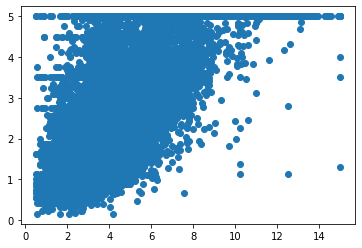

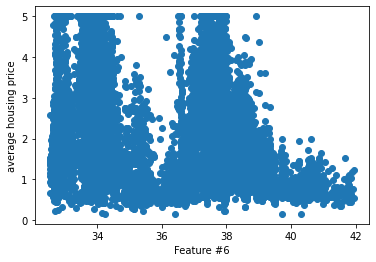

In [ ]:
plt.scatter(X[:,0], y)
plt.show()

def plot_feature(index):
  plt.scatter(X[:,index], y)
  plt.ylabel("average housing price")
  plt.xlabel(f"Feature #{index}")
  plt.show()

plot_feature(6)

Though we will proceed with using this dataset as provided to us, we can apply any transformations to the data that we think will help surface useful signal to our machine learning model. There is a lot of freedom and room for domain expertise in designing input features for any particular task.

If you have time, try adding a feature to the dataset by transforming one of the other features (e.g. take log, create a binary feature if a value crosses a certain threshold, etc.).


## Model

Now that we have looked at our data, we need to pick a type of model to learn from our data.
For this lab, we will use a simple linear model, where we assume that the relationship between the output variable and each input feature is linear. 

Mathematically, we write this model as
$$ y = f(x) = b + \sum_{i=1}^m w_i x_i $$
where $i$ indexes each dimension in the $m$-dimensional input feature vector $x$.
Together, the $w_i$ and $b$ are called the **weights** or **parameters** of the model.
If $x$ is 1-dimensional, then we get $y = wx + b$; if $x$ is 2-dimensional, then we get $y = w_1 x_1 + w_2 x_2 + b$; and so forth. 
Alternatively, we can write this as 
$$ y = w \cdot x $$
where $w$ is a vector representation of the $w_i$. To properly account for the bias term $b$, we append $b$ to $w$ (so that $w$ is $[w_1; w_2; \dots; w_m; b]$) and append a 1 to the input features $x$.

**(exercise)** Let's write a function which takes in some weights $w$ and $b$ and an input $x$ and outputs the $y$ computed by this model. You can use a for-loop, but we recommend using a vector product (you might find `np.dot()` useful).

In [ ]:
def linear(x, w, b):
  return np.dot(w,x)+b

assert linear([1], [10], 10) == 20
assert linear([1, 1], [1, 1], 0) == 2


## Training

In order to use this model, we need to first set the value of the weights. But, we don't know what the ''right'' values are.
In order to do so, we first need to be able to say what constitutes good weights. Then, we can introduce an **objective function** that measures how good any set of weights are. Given this objective function, the best weights are the ones that maximize (or minimize) the objective function.

For regression, we'll use the **residual sum of squares** (RSS):
$$ L(w) = \sum_{d \in D} (y_d - f(x_d))^2 = \sum_{d \in D} (y_d - w \cdot x_d)^2 $$
where $D$ is our dataset of $(x ,y)$ pairs. Intuitively, this objective function looks at the distance from our model's predictions to the actual output. To pick the best $w$, then, we want to minimize this objective function.

To minimize this expression, we look at where the gradient (or derivative, in 1-d) of the objective function with respect to the weights is equal to zero and solve for $w$ at that point. Let's first compute the derivative. 

For convenience, we'll use a vector product representation of the model and a matrix representation of the data ($X$ is a matrix where each row is a data point $x_i$ and $y$ is a column vector of the corresponding $y_i$).

$$X = \begin{bmatrix} x_1 \\ x_2 \\ \dots \\ x_D \end{bmatrix}; y = \begin{bmatrix} y_1 \\ y_2 \\ \dots \\ y_D \end{bmatrix} $$

$$ L(w) = (y - Xw)^\top (y - Xw)$$
$$ = y^\top y - 2w^\top X^\top y + w^\top X^\top X w $$

Now we can compute the gradient:

$$ \frac{\delta L}{\delta w} = \frac{\delta}{\delta w} ( y^\top y - 2w^\top X^\top y + w^\top X^\top X w ) $$
$$ = -2X^\top y + 2 X^\top X w $$

Now let's solve for $w$ when the gradient is zero:

$$ -2X^\top y + 2 X^\top X w = 0 $$
$$ X^\top X w = X^\top y $$
$$ w^* = (X^\top X)^{-1} X^\top Y $$

We now have a formula for the optimal value $w^*$ of the weights given the data.

**(exercise)** Write a function that appends 1 to each data point, then write a function that computes the optimal weights according to this formula. You might find `np.transpose()`, `np.matmul()`, and `np.linalg.inv()` useful.

In [ ]:
# write code for computing the optimal regression weights for the dataset
def append_ones(Xs):
  return np.hstack((Xs, np.ones((Xs.shape[0], 1))))

def compute_weights(Xs, ys):
  tmp1 = np.linalg.inv(np.matmul(np.transpose(Xs), Xs))
  tmp2 = np.matmul(np.transpose(Xs), ys)
  return np.matmul(tmp1, tmp2)

X_new = append_ones(X)
w_star = compute_weights(X_new, y)

Now that we can compute the optimal weights, we can do so on our dataset. However, we don't just care about how well our model does on our data, but also any future data we might receive. In order to see how well our learned model performs on future data, we can split up our dataset into a **training set** and a **test set**. 

**(exercise)** Let's write a function to reserve 20% of the data for testing, and then compute the optimal weights on the remaining 80% of the data. 

What is the value of the bias term $b$ the model learns?

In [ ]:
# split the dataset into training and test
n_exs = len(X_new)
n_train = int(n_exs * .8)
X_train = X_new[:n_train]
y_train = y[:n_train]
X_test = X_new[n_train:]
y_test = y[n_train:]
# use above function to compute the best w on the training data
w = compute_weights(X_train, y_train)

print(f"The bias is {w[-1]}")

The bias is -36.39051025357709



## Evaluation

Now that we have a model, let's evaluate how good our model is.
Again, we need some sense of what counts as good, so we will use the RSS to define good (lower RSS is better). However, since RSS is a sum, it will naturally be higher when we evaluate on more data, so let's instead compute the mean squared error (MSE) over examples. MSE is the following:

$$ MSE = \frac{1}{|D|} \sum_{i = 1}^{|D|} (y - w \cdot x)^2 $$


**(exercise)** Write a function to compute MSE, then compute the MSE for $w^*$ on the training data and the test data.


In [ ]:
# write code for evaluating the MSE of the model predictions versus the actual target on the test set
def mse(w, X, y):
  a = np.matmul(X,w)
  return np.mean(np.power(y-a,2))

print(f"Train error {mse(w, X_train, y_train)}")
print(f"Test error {mse(w, X_test, y_test)}")

Train error 0.5355338064877695
Test error 0.494684835638358


A nice property of a linear model is that the weights are interpretable: We can look at the magnitude of the weights for each feature to get a sense of which features are most influential in predicting the output.

**(exercise)** Write code to look at the learned weights and determine which features the model puts the highest weight on.

In [ ]:
# write code for looking at the weights to see the importance of each feature
print(w)

[ 4.47847084e-01  9.40820722e-03 -1.20960919e-01  7.10267788e-01
 -1.47053238e-06 -8.81496820e-03 -4.21714509e-01 -4.29775301e-01
 -3.63905103e+01]
